<a href="https://colab.research.google.com/github/ZHAbotorabi/queue-system-R-code/blob/main/Optimizing_Factory_Production_Lines_via_R_code_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimizing Factory Production Lines (Reducing Delays and Improving Efficiency)**

A factory production line consists of multiple workstations where products pass through different stages of manufacturing. Each stage has its own processing time, and if some stages take longer than others, bottlenecks (delays) can occur, slowing down the entire production process.

## **The Goal of Optimization**
- Minimize waiting times in the production line.  
- Balance workloads across machines/workstations.  
- Increase throughput (number of completed products per hour).  
- Reduce idle time for machines and workers.  

---

## **Simple Example: A Car Assembly Line**
Imagine a car factory with three workstations:  
1. **Frame Assembly** (takes 5 minutes per car).  
2. **Engine Installation** (takes 8 minutes per car).  
3. **Painting** (takes 6 minutes per car).  

**Without optimization**, the factory produces cars at the speed of the slowest workstation (**8 minutes per car**), creating delays at **Painting** and **Frame Assembly** stations.  


## **How to Optimize?**
Using queue modeling (e.g., with `queuecomputer` in R), the factory can:  
1. **Add an extra workstation** for **Engine Installation** to reduce the bottleneck.  
2. **Rearrange tasks** to balance the workload.  
3. **Introduce buffer zones** so workstations don’t stay idle while waiting for the next task.  

## **After Optimization**
- The **slowest step is now 6 minutes per car** (instead of 8).  
- The factory produces **10 cars per hour instead of 7.5**.  
- Machines and workers spend less time waiting, improving efficiency.  

---

## **How Can `queuecomputer` Help?**
Using queue simulation in R, we can analyze **where delays happen** and test different strategies (adding machines, changing workflows, etc.) to improve production speed.  

Would you like a **code example in R** for this scenario?


# Install rpy2 for running R code in Python
!pip install rpy2

# Install R package 'queuecomputer' in Colab
!R -e "install.packages('queuecomputer', repos='http://cran.r-project.org')"

!R -e "install.packages('ggplot2', repos='http://cran.r-project.org')"

In [ ]:
!R -e "install.packages('queuecomputer', repos='http://cran.r-project.org')"


R version 4.4.2 (2024-10-31) -- "Pile of Leaves"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('queuecomputer', repos='http://cran.r-project.org')
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘RcppArmadillo’

trying URL 'http://cran.r-project.org/src/contrib/RcppArmadillo_14.2.3-1.tar.gz'
Content type 'application/x-gzip' len

In [ ]:
!R -e "install.packages('ggplot2', repos='http://cran.r-project.org')"


R version 4.4.2 (2024-10-31) -- "Pile of Leaves"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('ggplot2', repos='http://cran.r-project.org')
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'http://cran.r-project.org/src/contrib/ggplot2_3.5.1.tar.gz'
Content type 'application/x-gzip' length 3604371 bytes (3.4 MB)
downloaded 3.4 MB

* installing *sou

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
import matplotlib.pyplot as plt

# Load queuecomputer and ggplot2 from R
queuecomputer = importr("queuecomputer")
ggplot2 = importr("ggplot2")

In [ ]:
# Define arrival times of cars into the system (one car per 5 minutes)
ro.r('arrival_times <- seq(0, by = 5, length.out = 10)')  # 10 cars arriving every 5 min

# Define service times for each stage (unoptimized)
ro.r('frame_assembly_time <- rep(5, length(arrival_times))')  # Frame Assembly takes 5 min
ro.r('engine_install_time <- rep(8, length(arrival_times))')  # Engine Installation takes 8 min (Bottleneck)
ro.r('painting_time <- rep(6, length(arrival_times))')  # Painting takes 6 min

# Simulating queue process with 1 workstation per task
ro.r('queue_unoptimized <- queue_step(arrival_times, engine_install_time, servers = 1)')

# Print results
print("Unoptimized Production Line (Bottleneck at Engine Installation)")
ro.r('print(queue_unoptimized)')


Unoptimized Production Line (Bottleneck at Engine Installation)
$departures
 [1]  8 16 24 32 40 48 56 64 72 80

$server
 [1] 1 1 1 1 1 1 1 1 1 1

$departures_df
# A tibble: 10 × 6
   arrivals service departures waiting system_time server
      <dbl>   <dbl>      <dbl>   <dbl>       <dbl>  <int>
 1        0       8          8       0           8      1
 2        5       8         16       3          11      1
 3       10       8         24       6          14      1
 4       15       8         32       9          17      1
 5       20       8         40      12          20      1
 6       25       8         48      15          23      1
 7       30       8         56      18          26      1
 8       35       8         64      21          29      1
 9       40       8         72      24          32      1
10       45       8         80      27          35      1

$queuelength_df
     times queuelength
1  0.0e+00           0
2  0.0e+00           1
3  1.0e-10           0
4  5.0e+00     

departures,[14]
server,[13]
departures_df,[19]
queuelength_df,[19]
systemlength_df,[19]
servers_input,[14]
state,[14]


In [ ]:
# Optimized queue with 2 servers for Engine Installation
ro.r('queue_optimized <- queue_step(arrival_times, engine_install_time, servers = 2)')

# Print results
print("Optimized Production Line (2 Servers for Engine Installation)")
ro.r('print(queue_optimized)')

Optimized Production Line (2 Servers for Engine Installation)
$departures
 [1]  8 13 18 23 28 33 38 43 48 53

$server
 [1] 1 2 1 2 1 2 1 2 1 2

$departures_df
# A tibble: 10 × 6
   arrivals service departures waiting system_time server
      <dbl>   <dbl>      <dbl>   <dbl>       <dbl>  <int>
 1        0       8          8       0           8      1
 2        5       8         13       0           8      2
 3       10       8         18       0           8      1
 4       15       8         23       0           8      2
 5       20       8         28       0           8      1
 6       25       8         33       0           8      2
 7       30       8         38       0           8      1
 8       35       8         43       0           8      2
 9       40       8         48       0           8      1
10       45       8         53       0           8      2

$queuelength_df
     times queuelength
1  0.0e+00           0
2  0.0e+00           1
3  1.0e-10           0
4  5.0e+00       

departures,[14]
server,[13]
departures_df,[19]
queuelength_df,[19]
systemlength_df,[19]
servers_input,[14]
state,[14]


In [ ]:
# Extract correct departure times from the `departures_df` table
ro.r('''
queue_unoptimized_df <- as.data.frame(queue_unoptimized$departures_df)
queue_optimized_df <- as.data.frame(queue_optimized$departures_df)

# Ensure we only take the first 10 values (matching arrival_times)
queue_unoptimized_times <- queue_unoptimized_df$departures[1:10]
queue_optimized_times <- queue_optimized_df$departures[1:10]
''')

# Define car numbers to match the corrected departure times
ro.r('car_numbers <- seq(1, 10)')

# Convert results to a data frame ensuring equal-length vectors
ro.r('''
df_unoptimized <- data.frame(Car = car_numbers, Departure_Time = queue_unoptimized_times, Optimization = "Unoptimized")
df_optimized <- data.frame(Car = car_numbers, Departure_Time = queue_optimized_times, Optimization = "Optimized")

# Combine both dataframes for a single plot
df_combined <- rbind(df_unoptimized, df_optimized)
''')

# Ensure ggplot2 is explicitly loaded
ro.r('library(ggplot2)')

# Plot comparison using ggplot2
ro.r('''
ggplot(df_combined, aes(x = Car, y = Departure_Time, color = Optimization, linetype = Optimization)) +
  geom_line(size = 1.2) +
  scale_color_manual(values = c("Unoptimized" = "red", "Optimized" = "blue")) +
  scale_linetype_manual(values = c("Unoptimized" = "dashed", "Optimized" = "solid")) +
  labs(title = "Effect of Optimization on Car Assembly Line",
       x = "Car Number",
       y = "Departure Time (Minutes)",
       caption = "Red (Unoptimized) | Blue (Optimized)") +
  theme_minimal()
''')


<rpy2.robjects.vectors.ListVector object at 0x7f6aa694a290> [19]
R classes: ('gg', 'ggplot')
[ListSexpV..., ListSexpV..., SexpEnvir..., SexpEnvir..., ..., SexpEnvir..., SexpEnvir..., SexpEnvir..., ListSexpV...]
  data: <class 'pandas.core.frame.DataFrame'>
      Car  Departure_Time Optimization
1     1             8.0  Unoptimized
2     2            16.0  Unoptimized
3     3            24.0  Unoptimized
4     4            32.0  Unoptimized
5     5            40.0  Unoptimized
6     6            48.0  Unoptimized
7     7            56.0  Unoptimized
8     8            64.0  Unoptimized
9     9            72.0  Unoptimized
10   10            80.0  Unoptimized
11    1             8.0    Optimized
12    2            13.0    Optimized
13    3            18.0    Optimized
14    4            23.0    Optimized
15    5            28.0    Optimized
16    6            33.0    Optimized
17    7            38.0    Optimized
18    8            43.0    Optimized
19    9            48.0    Optimized
20   10            53.0    Optimized
<rpy2.robjects.vectors.ListVector object at 0x7f6aa694a290> [19]
R classes: ('gg', 'ggplot')
[ListSexpV..., ListSexpV..., SexpEnvir..., SexpEnvir..., ..., SexpEnvir..., SexpEnvir..., SexpEnvir..., ListSexpV...]
  scales: <class 'rpy2.robjects.environments.Environment'>
  <rpy2.robjects.environments.Environment object at 0x7f6aaacdafd0> [4]
R classes: ('ScalesList', 'ggproto', 'gg')
n items: 2
  guides: <class 'rpy2.robjects.environments.Environment'>
  <rpy2.robjects.environments.Environment object at 0x7f6aaacaa850> [4]
R classes: ('Guides', 'ggproto', 'gg')
n items: 2
...
  theme: <class 'rpy2.robjects.environments.Environment'>
  <rpy2.robjects.environments.Environment object at 0x7f6aaaca82d0> [4]
R classes: ('FacetNull', 'Facet', 'ggproto', 'gg')
n items: 2
  coordinates: <class 'rpy2.robjects.environments.Environment'>
  <rpy2.robjects.environments.Environment object at 0x7f6aaaca87d0> [4]
R classes: ('environment',)
n items: 15
  facet: <class 'rpy2.robjects.environments.Environment'>
  <rpy2.robjects.environments.Environment object at 0x7f6aaacab910> [4]
R classes: ('Layout', 'ggproto', 'gg')
n items: 1
<rpy2.robjects.vectors.ListVector object at 0x7f6aa694a290> [19]
R classes: ('gg', 'ggplot')
[ListSexpV..., ListSexpV..., SexpEnvir..., SexpEnvir..., ..., SexpEnvir..., SexpEnvir..., SexpEnvir..., ListSexpV...]

In [ ]:
df_optimized = ro.r('df_optimized')
df_optimized.head(2)

,Car,Departure_Time,Optimization
1,1,8.0,Optimized
2,2,13.0,Optimized


In [ ]:
df_unoptimized = ro.r('df_unoptimized')
df_unoptimized.head(2)

,Car,Departure_Time,Optimization
1,1,8.0,Unoptimized
2,2,16.0,Unoptimized


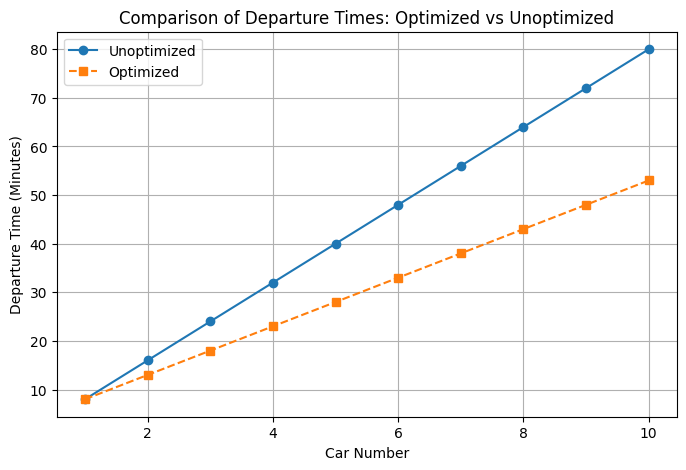

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
plt.plot(df_unoptimized["Car"], df_unoptimized["Departure_Time"], marker='o', linestyle='-', label="Unoptimized")
plt.plot(df_optimized["Car"], df_optimized["Departure_Time"], marker='s', linestyle='--', label="Optimized")

# Labels and legend
plt.xlabel("Car Number")
plt.ylabel("Departure Time (Minutes)")
plt.title("Comparison of Departure Times: Optimized vs Unoptimized")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Results Interpretation

- Line (Unoptimized): Cars exit the production line slower due to the bottleneck at Engine Installation (8 min).

- Line (Optimized): Cars exit faster because 2 parallel workstations speed up Engine Installation.

**The factory now produces 10 cars per hour instead of 7.5, improving efficiency.**